In [86]:
# 데이터를 표준화(스케일링), 분할  28 28 1
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
# 데이터 로드
(x_train,y_train),(x_test_original,y_test_original) =  keras.datasets.fashion_mnist.load_data()
ss = StandardScaler()
x_train_scaled =  ss.fit_transform(x_train.reshape( x_train.shape[0],-1 ))
x_train_scaled = x_train_scaled.reshape(-1,28,28,1)
x_train,x_test,y_train,y_test =  train_test_split(x_train_scaled,y_train,random_state=32)
x_train.shape

(45000, 28, 28, 1)

In [87]:
model = keras.Sequential()

In [88]:
# 1번째 합성곱 층
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',input_shape=(28,28,1)) )
# (28,28,32) 특성맵
model.add(keras.layers.MaxPooling2D(2))  # (14,14,32)

In [89]:
#(14,14,32)

In [90]:
# 2번째 합성곱 층
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
# 특성맵 (14,14,64)
model.add(keras.layers.MaxPooling2D(2))
# 특성맵(7,7,64)

In [91]:
# 완전연결층에 앞에서만든 합성곱을 연결한다.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))


In [92]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [93]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [94]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)

In [95]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

In [96]:
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test)
                    , callbacks=[checkpoint_cb,early_stopping_cb] )

Epoch 1/100
1407/1407 [==============================] - 35s 25ms/step - loss: 0.4908 - accuracy: 0.8278 - val_loss: 0.3025 - val_accuracy: 0.8904
Epoch 2/100
1407/1407 [==============================] - 31s 22ms/step - loss: 0.3251 - accuracy: 0.8847 - val_loss: 0.2752 - val_accuracy: 0.8975
Epoch 3/100
1407/1407 [==============================] - 29s 21ms/step - loss: 0.2715 - accuracy: 0.9004 - val_loss: 0.2580 - val_accuracy: 0.9073
Epoch 4/100
1407/1407 [==============================] - 29s 21ms/step - loss: 0.2420 - accuracy: 0.9125 - val_loss: 0.2407 - val_accuracy: 0.9121
Epoch 5/100
1407/1407 [==============================] - 29s 21ms/step - loss: 0.2124 - accuracy: 0.9208 - val_loss: 0.2380 - val_accuracy: 0.9176
Epoch 6/100
1407/1407 [==============================] - 29s 21ms/step - loss: 0.1962 - accuracy: 0.9270 - val_loss: 0.2280 - val_accuracy: 0.9185
Epoch 7/100
1407/1407 [==============================] - 29s 20ms/step - loss: 0.1773 - accuracy: 0.9338 - val_loss: 0

In [97]:
import matplotlib.pyplot as plt

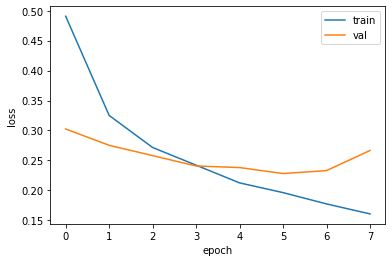

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [107]:
x_test_original.shape
temp =  ss.fit_transform(x_test_original.reshape(-1,28*28))
temp = temp.reshape(-1,28,28,1)
model.evaluate(temp,y_test_original)

313/313 [==============================] - 2s 6ms/step - loss: 0.2524 - accuracy: 0.9117


[0.2523631453514099, 0.9117000102996826]

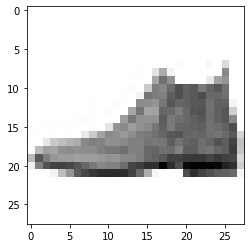

In [112]:
plt.imshow(x_test_original[0], cmap='gray_r')
plt.show()

In [114]:
x_test_original[0].shape  #-1,28,28,1

(28, 28)

In [115]:
temp = x_test_original[0].reshape(-1,28,28,1)

In [116]:
predics =  model.predict(temp)

1/1 [==============================] - 0s 108ms/step


In [117]:
predics

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [123]:
import numpy as np

In [124]:
np.unique( y_test_original)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [128]:
temp = x_test_original[y_test_original == 9][0]
temp.shape

(28, 28)

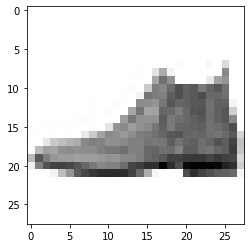

In [130]:
plt.imshow(temp,cmap='gray_r')
plt.show()

In [131]:
# 모델 층의 가중치 분포
model.layers

In [132]:
conv = model.layers[0]

In [135]:
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [ ]:
# best-cnn-model.h5 파일로 합성곱 신경망 모델이 저장되어 있으므로 다른파일에서 불러와서 사용